<a href="https://colab.research.google.com/github/Abdelrahman-Elnagar/Basic_Data_Tasks/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clara Amir Hakim Zaher 10002591
Abdelrahman Ali Hasan Elnagar 10006921

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
!pip install ucimlrepo

In [4]:
#Load the Wholesale Customers dataset from from the UCI ML Repository (id = 292) by using the fetch_ucirepo function from ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
wholesale_customers = fetch_ucirepo(id=292)

In [5]:
data = pd.DataFrame(wholesale_customers.data.features, columns=wholesale_customers.feature_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB
None
missing_values
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


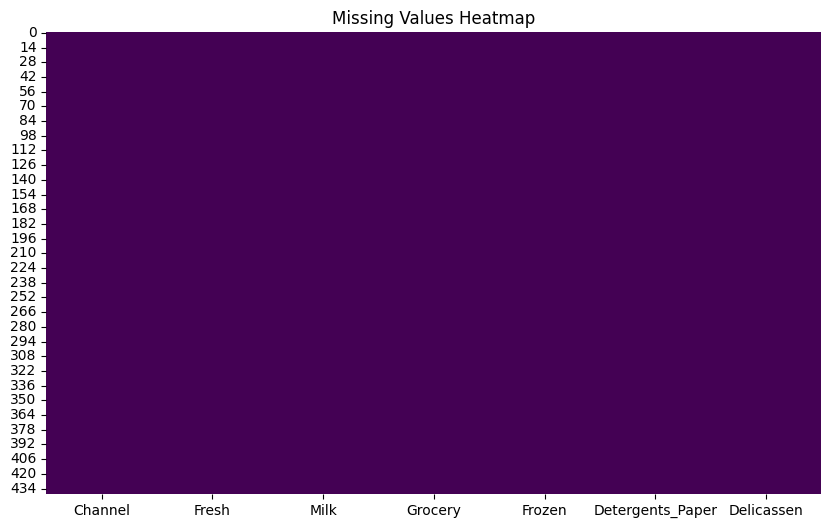

In [6]:
# Explore its features and structure. Perform initial data analysis to understand the distribution of features and identify potential preprocessing requirements.
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("missing_values")
print(missing_values)

# Also we can visualize missing values using a heatmap like this one alsi since there are no missing values it is basically empty
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
# Display the first few rows of the dataset
print(data.head())

# Display summary statistics of the dataset
print(data.describe())



   Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2  12669  9656     7561     214              2674        1338
1        2   7057  9810     9568    1762              3293        1776
2        2   6353  8808     7684    2405              3516        7844
3        1  13265  1196     4221    6404               507        1788
4        2  22615  5410     7198    3915              1777        5185
          Channel          Fresh          Milk       Grocery        Frozen  \
count  440.000000     440.000000    440.000000    440.000000    440.000000   
mean     1.322727   12000.297727   5796.265909   7951.277273   3071.931818   
std      0.468052   12647.328865   7380.377175   9503.162829   4854.673333   
min      1.000000       3.000000     55.000000      3.000000     25.000000   
25%      1.000000    3127.750000   1533.000000   2153.000000    742.250000   
50%      1.000000    8504.000000   3627.000000   4755.500000   1526.000000   
75%      2.000000   16933.75

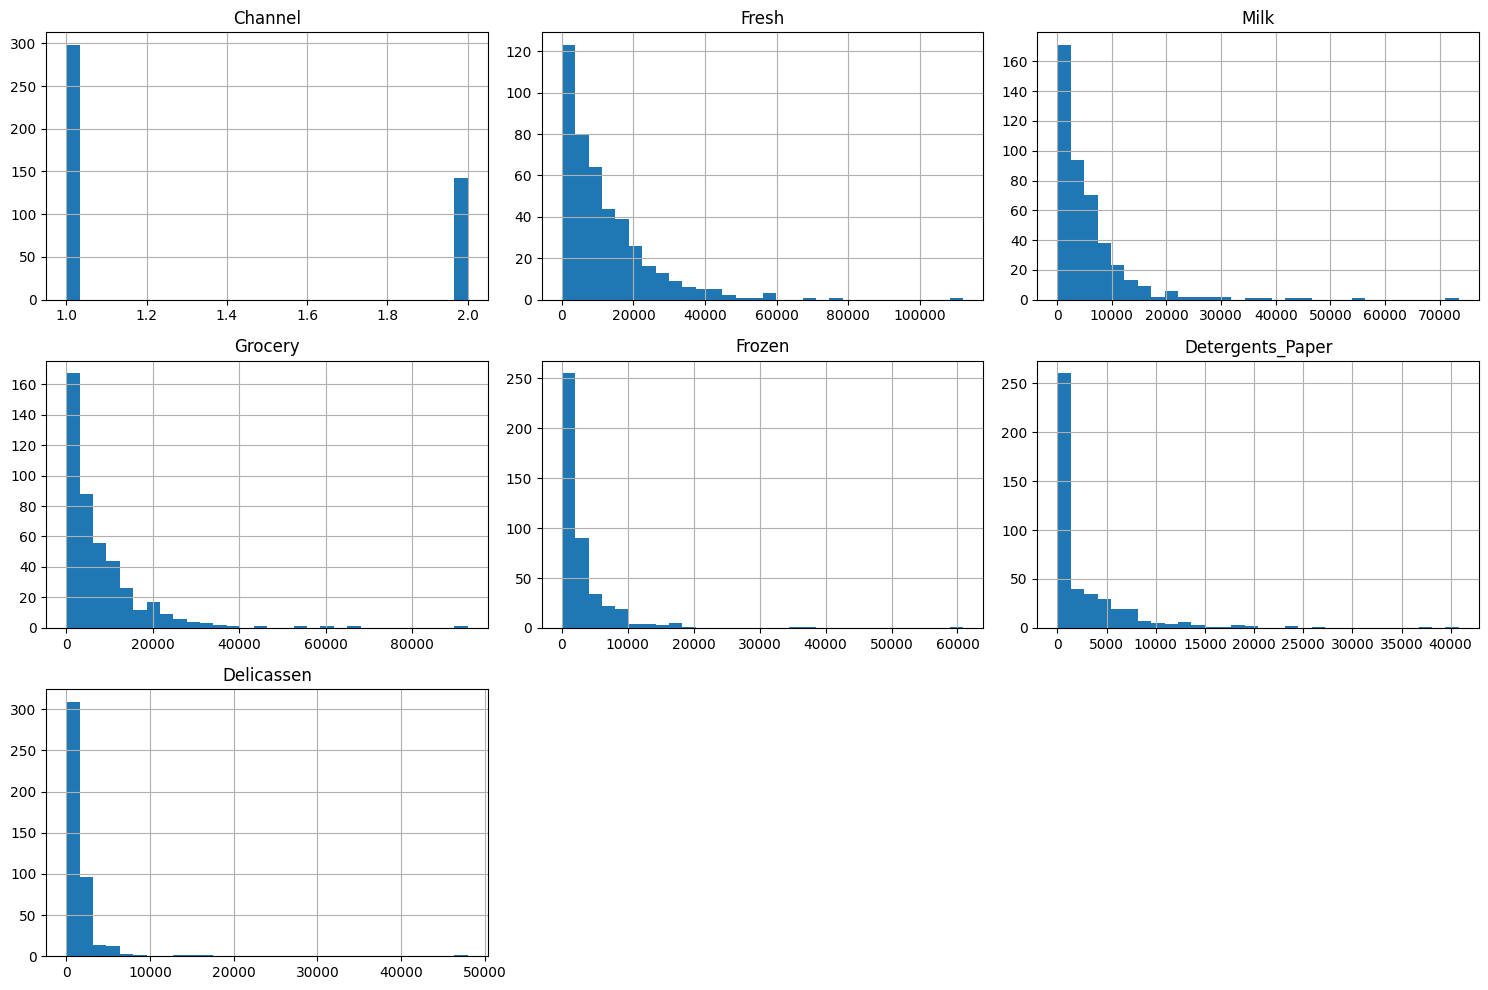

In [8]:
# Visualize the distribution of each feature
data.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [9]:
#Feature Scaling:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [10]:
# Example of one-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

In [11]:
#Feature scaling ensures that all features contribute equally to the distance calculations used in K-means clustering. We'll use StandardScaler from scikit-learn to standardize the features so that they have a mean of 0 and a standard deviation of 1.
# Separate features and target if necessary (assuming all are features for clustering)
features = data.columns

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])


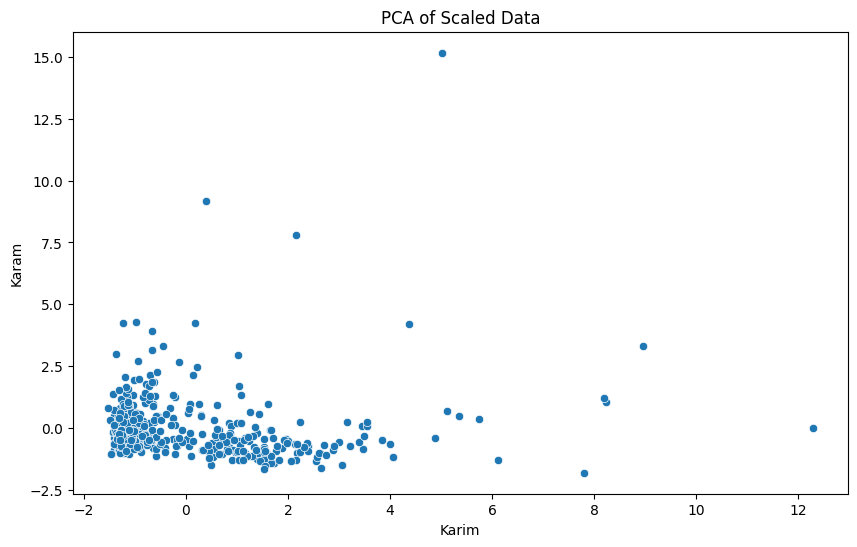

In [12]:
#Principal Component Analysis (PCA) will be used to reduce the dataset to 2 dimensions for visualization. PCA identifies the axes (principal components) that capture the most variance in the data, providing a compact representation.
# Apply PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA of Scaled Data')
plt.xlabel('Karim')#Principal Component_1
plt.ylabel('Karam')#Principal Component_2
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

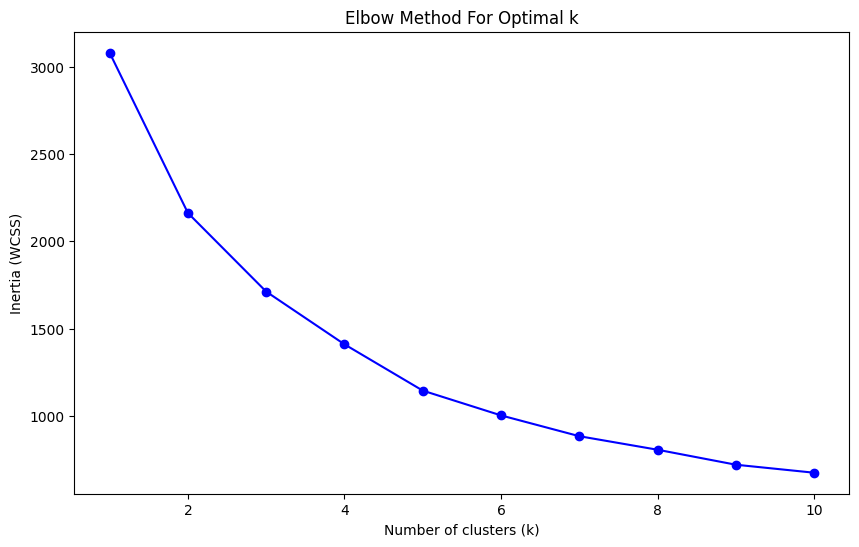

In [13]:
#After that we need to determine the the optimal number of clusters to be used then we train the K-mean Model
#Then Visualize the clusters in the 2D PCA-transformed space.

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


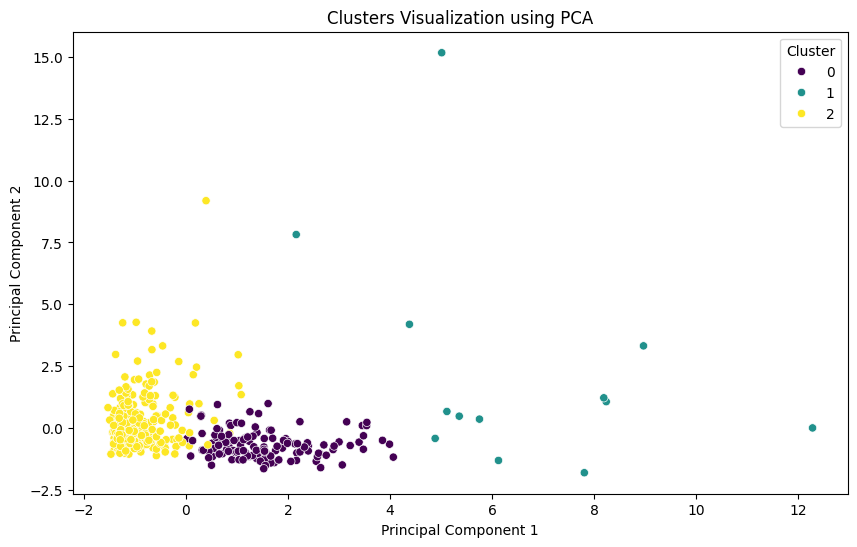

Cluster Centers:
[[ 1.44865163e+00 -3.03522355e-01  4.00468697e-01  6.27264086e-01
  -3.36203224e-01  6.52954644e-01  3.59872191e-03]
 [ 1.11958260e+00  1.09004412e+00  3.98320348e+00  3.58457916e+00
   7.77992824e-01  3.56664129e+00  2.25618179e+00]
 [-6.83095239e-01  8.51425337e-02 -3.49638303e-01 -4.31460809e-01
   1.13106103e-01 -4.41920675e-01 -1.00330630e-01]]


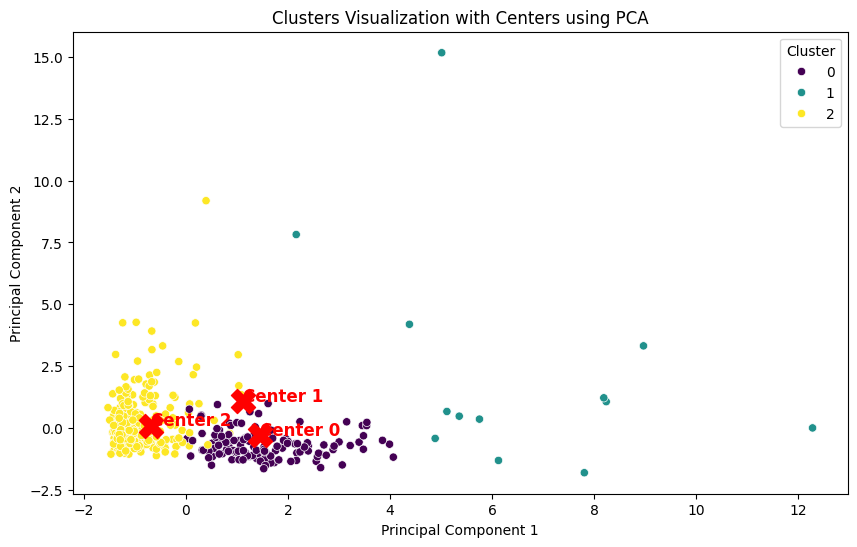

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Set the optimal number of clusters
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the cluster centers
cluster_centers = kmeans.cluster_centers_

# Plotting cluster centers on PCA plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], s=300, c='red', marker='X')  # Cluster centers marked as 'X'
    plt.text(center[0], center[1], f'Center {i}', fontsize=12, weight='bold', color='red')

plt.title('Clusters Visualization with Centers using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
